# Machine Learning for Beer

Your goal is to train a model to predict the bitterness of a beer (in International Bittering Units, or IBU), given features about the beer. You can acquire the data in two places:

- on [Kaggle](https://www.kaggle.com/c/beer2020/data) 
- on [Github](https://github.com/dlsun/pods/tree/master/data/beer) (https://dlsun.github.io/pods/data/beer/beer_train.csv and https://dlsun.github.io/pods/data/beer/beer_test.csv )

A description of the variables is available [here](https://www.kaggle.com/c/beer2020/data).


We would like to predict **ibu** using a $20$-nearest neighbors model.

There are three features that have to do with the physical properties of the beer:  **abv**, **srm**, **original gravity**

There are two "cultural" features that have to do with how/when the beer is traditionally served: **glass**, **available**

Consider predicting **ibu** from 
(a) Only the physical features
(b) Only the cultural features
(c) All five features

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

df_beer_train = pd.read_csv("https://dlsun.github.io/pods/data/beer/beer_train.csv")
df_beer_test = pd.read_csv("https://dlsun.github.io/pods/data/beer/beer_test.csv")


In [2]:
df_beer_train["srm"] = df_beer_train["srm"].str.replace("Over 40", "40").astype(int)
df_beer_test["srm"] = df_beer_test["srm"].str.replace("Over 40", "40").astype(int)


## Question 1
Let's see how the distance metric, the scaling method, and the model influence prediction accuracy. 

Consider only the *physical* features. Train a **20**-nearest-neighbor model to predict **ibu**. Try fitting models with different distance metrics and scaling methods. 

Which distance metric and/or scaling method gives the best prediction accuracy? Why do you think that might be?

In [3]:
X_train = df_beer_train[["abv", "originalGravity", "srm"]]
Y_train = df_beer_train["ibu"]

ct = make_column_transformer(
    (StandardScaler(), ["abv", "originalGravity", "srm"]),
    remainder="drop"  
)  

beer_pipeline = make_pipeline(
          ct,
          KNeighborsRegressor(n_neighbors=20, metric = "manhattan")
)

beer_pipeline.fit(X=X_train, y=Y_train)

x_new = df_beer_train[["abv", "originalGravity", "srm"]]
y_train_ = beer_pipeline.predict(X= x_new)
mse = ((df_beer_train["ibu"] - y_train_) ** 2).mean()
mse


447.62426951814217

In [4]:

ct = make_column_transformer(
    (Normalizer(), ["abv", "originalGravity", "srm"]),
    remainder="drop"  
)  

beer_pipeline = make_pipeline(
          ct,
          KNeighborsRegressor(n_neighbors=20, metric = "manhattan")
)

beer_pipeline.fit(X=X_train, y=Y_train)

x_new = df_beer_train[["abv", "originalGravity", "srm"]]
y_train_ = beer_pipeline.predict(X= x_new)
mse = ((df_beer_train["ibu"] - y_train_) ** 2).mean()
mse


534.1289967850107

In [5]:

ct = make_column_transformer(
    (MinMaxScaler(), ["abv", "originalGravity", "srm"]),
    remainder="drop"  
)  

beer_pipeline = make_pipeline(
          ct,
          KNeighborsRegressor(n_neighbors=20, metric = "manhattan")
)

beer_pipeline.fit(X=X_train, y=Y_train)

x_new = df_beer_train[["abv", "originalGravity", "srm"]]
y_train_ = beer_pipeline.predict(X= x_new)
mse = ((df_beer_train["ibu"] - y_train_) ** 2).mean()
mse


497.14169182646776

In [6]:
ct = make_column_transformer(
    (StandardScaler(), ["abv", "originalGravity", "srm"]),
    remainder="drop"  
)  

beer_pipeline = make_pipeline(
          ct,
          KNeighborsRegressor(n_neighbors=20, metric = "euclidean")
)

beer_pipeline.fit(X=X_train, y=Y_train)

x_new = df_beer_train[["abv", "originalGravity", "srm"]]
y_train_ = beer_pipeline.predict(X= x_new)
mse = ((df_beer_train["ibu"] - y_train_) ** 2).mean()
mse

461.41379440783703

Using the standard scaler with the manhattan distance metric minimized the mse compared to the min max scaler, normalizer, and euclidean distance. This makes sense because standard scaler goes by columns, which will allow the mean square error to be smaller than it would by each row.

## Question 2

Repeat Question 1, this time using the *cultural* features.

In [7]:
X_train = df_beer_train[["glass", "available"]]
Y_train = df_beer_train["ibu"]

ct = make_column_transformer(
    (OneHotEncoder(), ["glass", "available"]),
    remainder="drop"  
)  

beer_pipeline = make_pipeline(
          ct,
          KNeighborsRegressor(n_neighbors=20, metric = "manhattan")
)

beer_pipeline.fit(X=X_train, y=Y_train)

x_new = df_beer_train[["glass", "available"]]
y_train_ = beer_pipeline.predict(X= x_new)
mse = ((df_beer_train["ibu"] - y_train_) ** 2).mean()
mse

818.4100147235077

In [8]:
X_train = df_beer_train[["glass", "available"]]
Y_train = df_beer_train["ibu"]

ct = make_column_transformer(
    (OneHotEncoder(), ["glass", "available"]),
    remainder="drop"  
)  

beer_pipeline = make_pipeline(
          ct,
          KNeighborsRegressor(n_neighbors=20, metric = "euclidean")
)

beer_pipeline.fit(X=X_train, y=Y_train)

x_new = df_beer_train[["glass", "available"]]
y_train_ = beer_pipeline.predict(X= x_new)
mse = ((df_beer_train["ibu"] - y_train_) ** 2).mean()
mse

818.4100147235077

The mean squared error, after comparing different scalers, appear to be the same for the cultural features. 

## Question 3

Finally, repeat Question 1, using *all* the features.

In [9]:
X_train = df_beer_train[["glass", "available", "abv", "originalGravity", "srm"]]
Y_train = df_beer_train["ibu"]

ct = make_column_transformer(
    (OneHotEncoder(), ["glass", "available"]),
    (StandardScaler(), ["abv", "originalGravity", "srm"]),
    remainder="drop"  
)  

beer_pipeline = make_pipeline(
          ct,
          KNeighborsRegressor(n_neighbors=20, metric = "manhattan")
)

beer_pipeline.fit(X=X_train, y=Y_train)
y_train_ = beer_pipeline.predict(X= X_train)
mse = ((df_beer_train["ibu"] - y_train_) ** 2).mean()
mse


486.1048350029978

In [10]:
X_train = df_beer_train[["glass", "available", "abv", "originalGravity", "srm"]]
Y_train = df_beer_train["ibu"]

ct = make_column_transformer(
    (OneHotEncoder(), ["glass", "available"]),
    (Normalizer(), ["abv", "originalGravity", "srm"]),
    remainder="drop"  
)  

beer_pipeline = make_pipeline(
          ct,
          KNeighborsRegressor(n_neighbors=20, metric = "euclidean")
)

beer_pipeline.fit(X=X_train, y=Y_train)

x_new = df_beer_train[["glass", "available", "abv", "originalGravity", "srm"]]
y_train_ = beer_pipeline.predict(X= x_new)
mse = ((df_beer_train["ibu"] - y_train_) ** 2).mean()
mse


597.926680086825

Like problem 1, the manhattan distance with the standard scaler results in the smallest mse. However, it is not as low as it was with just the quantitative variables, we might possibly be overfitting the model by adding too many factors that are not significant.

## Question 4

Finally, let's determine the right value of $k$. Use the set of features, the distance metric, and the scaling method that you determined to be best (for $k=20$ nearest neighbors model) in Question 4. Fit $k$-nearest neighbor models for different values of $k$. Plot the training error and the estimated test error as functions of $k$, and determine the optimal value of $k$.

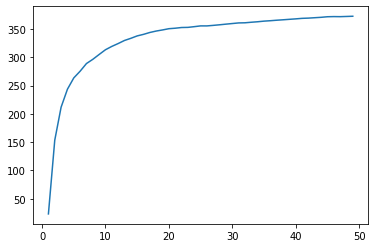

In [11]:
import matplotlib.pyplot as plt

df_train = df_beer_train[:5000]
X_train = df_train[["glass", "available", "abv", "originalGravity", "srm"]]
Y_train = df_train["ibu"]

ct = make_column_transformer(
    (OneHotEncoder(), ["glass", "available"]),
    (StandardScaler(), ["abv", "originalGravity", "srm"]),
    remainder="drop"  
)  
k = 1
mse_store = []
while k < 50:
  beer_pipeline = make_pipeline(
            ct,
            KNeighborsRegressor(n_neighbors=k, metric = "manhattan")
  )

  beer_pipeline.fit(X=X_train, y=Y_train)

  x_new = df_train[["glass", "available", "abv", "originalGravity", "srm"]]
  y_train_ = beer_pipeline.predict(X= X_train)

  mse = ((df_train["ibu"] - y_train_) ** 2).mean()
  mse_store.append(mse)
  k += 1

plt.plot(list(range(1, 50)), mse_store)


6

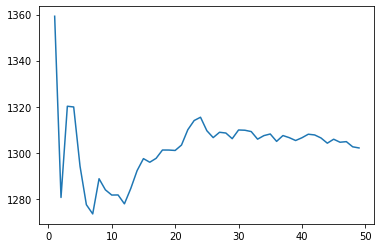

In [12]:

df_test = df_beer_train[5000:]
X_train = df_train[["glass", "available", "abv", "originalGravity", "srm"]]
Y_train = df_train["ibu"]

ct = make_column_transformer(
    (OneHotEncoder(), ["glass", "available"]),
    (StandardScaler(), ["abv", "originalGravity", "srm"]),
    remainder="drop"  
)  
k = 1
mse_store = []
while k < 50:
  beer_pipeline = make_pipeline(
            ct,
            KNeighborsRegressor(n_neighbors=k, metric = "manhattan")
  )

  beer_pipeline.fit(X=X_train, y=Y_train)

  x_new = df_test[["glass", "available", "abv", "originalGravity", "srm"]]
  y_train_ = beer_pipeline.predict(X= x_new)

  mse = ((df_test["ibu"] - y_train_) ** 2).mean()
  mse_store.append(mse)
  k += 1

plt.plot(list(range(1, 50)), mse_store)
min = min(mse_store)
index = mse_store.index(min)
index

It looks like the optimal value of k is 6 for mean squared error.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 4 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.